# Memesense Project

### Importacion de librerias

In [68]:
#import the data set from raw data
import pandas as pd
import numpy as np

### Read the Dataset

In [69]:
df = pd.read_csv('raw_data/memotion_dataset_7k/labels.csv')

In [70]:
df.head()

,Unnamed: 0,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
0,0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,hilarious,general,not_offensive,not_motivational,very_positive
1,1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,not_funny,general,not_offensive,motivational,very_positive
2,2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,very_funny,not_sarcastic,not_offensive,not_motivational,positive
3,3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,very_funny,twisted_meaning,very_offensive,motivational,positive
4,4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,hilarious,very_twisted,very_offensive,not_motivational,neutral


## EDA

### Dataset Dimension

In [71]:
# Dimesion del dataset
print(df.shape)

(7301, 9)


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7301 entries, 0 to 7300
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         7301 non-null   int64 
 1   image_name         7301 non-null   object
 2   text_ocr           7140 non-null   object
 3   text_corrected     7296 non-null   object
 4   humour             7301 non-null   object
 5   sarcasm            7301 non-null   object
 6   offensive          7301 non-null   object
 7   motivational       7301 non-null   object
 8   overall_sentiment  7301 non-null   object
dtypes: int64(1), object(8)
memory usage: 513.5+ KB


In [73]:
# valores unicos

columns = ["humour", "sarcasm", "offensive", "motivational", "overall_sentiment"]

for col in columns:
    print(df[col].value_counts())
    print("\n")

humour
funny         2452
very_funny    2238
not_funny     1960
hilarious      651
Name: count, dtype: int64


sarcasm
general            3507
twisted_meaning    1701
not_sarcastic      1544
very_twisted        549
Name: count, dtype: int64


offensive
not_offensive        2713
slight               2592
very_offensive       1724
hateful_offensive     272
Name: count, dtype: int64


motivational
not_motivational    4834
motivational        2467
Name: count, dtype: int64


overall_sentiment
positive         3127
neutral          2201
very_positive    1033
negative          789
very_negative     151
Name: count, dtype: int64




### Data cleaning

In [74]:
df.isna().sum()

Unnamed: 0             0
image_name             0
text_ocr             161
text_corrected         5
humour                 0
sarcasm                0
offensive              0
motivational           0
overall_sentiment      0
dtype: int64

In [75]:
# drop columns text_ocr and Unnamed: 0
df_cleaned = df.drop(columns=['text_ocr', 'Unnamed: 0'], inplace=True)

In [76]:
df_cleaned = df.dropna(subset=['text_corrected'])

In [77]:
print(f"Duplicados encontrados: {df_cleaned.duplicated().sum()}")


Duplicados encontrados: 0


In [78]:
print(df_cleaned['overall_sentiment'].value_counts())


overall_sentiment
positive         3123
neutral          2200
very_positive    1033
negative          789
very_negative     151
Name: count, dtype: int64


In [79]:
df_cleaned['text_cleaned'] = df_cleaned['text_corrected'].str.lower().str.replace('[^\w\s]', '', regex=True)


/var/folders/ds/yz0jtfz15vg64w8vm3sm4mb40000gn/T/ipykernel_99026/3255724146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['text_cleaned'] = df_cleaned['text_corrected'].str.lower().str.replace('[^\w\s]', '', regex=True)


In [80]:
# Eliminar filas donde el texto esté vacío
df_cleaned = df_cleaned[df_cleaned['text_cleaned'].str.strip() != ""]

In [81]:
df_cleaned.head()

,image_name,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment,text_cleaned
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,hilarious,general,not_offensive,not_motivational,very_positive,look there my friend lightyear now all sohalik...
1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,not_funny,general,not_offensive,motivational,very_positive,the best of 10 yearchallenge completed in less...
2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,very_funny,not_sarcastic,not_offensive,not_motivational,positive,sam thorne strippin follow follow saw everyon...
3,image_4.png,10 Year Challenge - Sweet Dee Edition,very_funny,twisted_meaning,very_offensive,motivational,positive,10 year challenge sweet dee edition
4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,hilarious,very_twisted,very_offensive,not_motivational,neutral,10 year challenge with no filter 47 hilarious ...


In [82]:
df_cleaned.isna().sum()

image_name           0
text_corrected       0
humour               0
sarcasm              0
offensive            0
motivational         0
overall_sentiment    0
text_cleaned         0
dtype: int64

In [83]:
df_cleaned.drop(columns=['text_corrected'], inplace=True)

In [84]:
#reemplazar de la columna overall_sentiment very_positive por positive y very_negative por negative
df_cleaned['overall_sentiment'] = df_cleaned['overall_sentiment'].replace('very_positive', 'positive')
df_cleaned['overall_sentiment'] = df_cleaned['overall_sentiment'].replace('very_negative', 'negative')
df_cleaned['overall_sentiment'] = df_cleaned['overall_sentiment'].replace('neutral', 'negative')
print(df_cleaned['overall_sentiment'].value_counts())

overall_sentiment
positive    4156
negative    3140
Name: count, dtype: int64


In [85]:
df_cleaned.head()

,image_name,humour,sarcasm,offensive,motivational,overall_sentiment,text_cleaned
0,image_1.jpg,hilarious,general,not_offensive,not_motivational,positive,look there my friend lightyear now all sohalik...
1,image_2.jpeg,not_funny,general,not_offensive,motivational,positive,the best of 10 yearchallenge completed in less...
2,image_3.JPG,very_funny,not_sarcastic,not_offensive,not_motivational,positive,sam thorne strippin follow follow saw everyon...
3,image_4.png,very_funny,twisted_meaning,very_offensive,motivational,positive,10 year challenge sweet dee edition
4,image_5.png,hilarious,very_twisted,very_offensive,not_motivational,negative,10 year challenge with no filter 47 hilarious ...


In [86]:
import os

image_folder = 'raw_data/memotion_dataset_7k/images/'

# Verificar imágenes existentes
df_cleaned['image_exists'] = df_cleaned['image_name'].apply(lambda x: os.path.exists(os.path.join(image_folder, x)))

# Filtrar solo las filas con imágenes válidas
df_cleaned = df_cleaned[df_cleaned['image_exists']]

df_cleaned.head()


,image_name,humour,sarcasm,offensive,motivational,overall_sentiment,text_cleaned,image_exists
0,image_1.jpg,hilarious,general,not_offensive,not_motivational,positive,look there my friend lightyear now all sohalik...,True
1,image_2.jpeg,not_funny,general,not_offensive,motivational,positive,the best of 10 yearchallenge completed in less...,True
2,image_3.JPG,very_funny,not_sarcastic,not_offensive,not_motivational,positive,sam thorne strippin follow follow saw everyon...,True
3,image_4.png,very_funny,twisted_meaning,very_offensive,motivational,positive,10 year challenge sweet dee edition,True
4,image_5.png,hilarious,very_twisted,very_offensive,not_motivational,negative,10 year challenge with no filter 47 hilarious ...,True


## Preprocessing

### Preprocessing Images

In [87]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import os


In [88]:
#colocar un rotacion
#hacer un swap
#solo en negativos
# balancear negativos


image_folder = 'raw_data/memotion_dataset_7k/images/'

# Función para procesar imágenes
def preprocess_image(image_path, target_size=(224, 224)):
    """
    Carga, redimensiona y normaliza una imagen.
    """
    img = cv2.imread(image_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir a RGB
        img = cv2.resize(img, target_size)  # Redimensionar
        img = img / 255.0  # Normalizar
    return img

# Procesar imágenes
images = []
labels = []
for idx, row in df_cleaned.iterrows():
    image_path = os.path.join(image_folder, row['image_name'])
    if os.path.exists(image_path):
        img = preprocess_image(image_path)
        if img is not None:
            images.append(img)
            labels.append(row['overall_sentiment'])  # Etiqueta del sentimiento general

# Convertir a numpy array
images = np.array(images)
print(f"Imágenes procesadas: {images.shape}")

libpng warning: iCCP: profile 'icc': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: known incorrect sRGB profile
libpng error: Read Error
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Imágenes procesadas: (7292, 224, 224, 3)


### Preprocessing Text

In [89]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [90]:
# Tokenización
tokenizer = Tokenizer(num_words=10000)  # Máximo número de palabras únicas
tokenizer.fit_on_texts(df_cleaned['text_cleaned'])

# Convertir a secuencias
sequences = tokenizer.texts_to_sequences(df_cleaned['text_cleaned'])

# Padding
max_len = 50  # Longitud máxima de las secuencias
text_data = pad_sequences(sequences, maxlen=max_len)
print(f"Texto procesado: {text_data.shape}")


Texto procesado: (7296, 50)


### Conversion de Etiquetas

In [91]:
from sklearn.preprocessing import LabelEncoder

# Codificación de etiquetas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)  # Convertir etiquetas a números

### Split the data

In [92]:
#quedarme solo con los negativos, X_train_images, y_train
from sklearn.model_selection import train_test_split

# Asegurarse de que las longitudes de images, text_data y y sean consistentes
min_length = min(len(images), len(text_data), len(y))
images = images[:min_length]
text_data = text_data[:min_length]
y = y[:min_length]

# Dividir los datos
X_train_images, X_test_images, text_data_train, text_data_test, y_train, y_test = train_test_split(
    images, text_data, y, test_size=0.2, random_state=42
)

print(f"Conjunto de entrenamiento - Imágenes: {X_train_images.shape}, Texto: {text_data_train.shape}")
print(f"Conjunto de prueba - Imágenes: {X_test_images.shape}, Texto: {text_data_test.shape}")

Conjunto de entrenamiento - Imágenes: (5833, 224, 224, 3), Texto: (5833, 50)
Conjunto de prueba - Imágenes: (1459, 224, 224, 3), Texto: (1459, 50)


In [93]:
import pickle

# Guardar el tokenizador
#with open('tokenizer.pkl', 'wb') as f:
    #pickle.dump(tokenizer, f)

# Guardar el label encoder
#with open('label_encoder.pkl', 'wb') as f:
   # pickle.dump(label_encoder, f)

### Multimodal Model

Using:
- CNN (Convolutional Neural Network): For processing images.
- LSTM (Long Short-Term Memory): For processing text.
- Concatennate: To combined both outputs in a Dense cape.

In [94]:
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate, LSTM, Embedding, GlobalAveragePooling2D # bbg, resnet
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2

# Entrada para imágenes
image_input = Input(shape=(224, 224, 3), name="Image_Input")
cnn_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))(image_input)
cnn_out = GlobalAveragePooling2D()(cnn_base)

# Entrada para texto
text_input = Input(shape=(50,), name="Text_Input")  # La longitud máxima del texto (max_len=50)
embedding = Embedding(input_dim=10000, output_dim=128, input_length=50)(text_input) # 
lstm_out = LSTM(128)(embedding)

# Combinar las salidas de imágenes y texto
combined = Concatenate()([cnn_out, lstm_out])
x = Dense(128, activation='relu')(combined)
x = Dropout(0.5)(x)
output = Dense(len(set(y_train)), activation='softmax', name="Output")(x)

# Crear el modelo final
model = Model(inputs=[image_input, text_input], outputs=output)

# Compilación del modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

/Users/gerardovargas/.pyenv/versions/memesense/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Image_Input         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Text_Input          │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mobilenetv2_1.00_2… │ (None, 7, 7,      │  2,257,984 │ Image_Input[0][0] │
│ (Functional)        │ 1280)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_5         │ (None, 50, 128)   │  1,280,000 │ Text_Input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1280)      │          0 │ mobilenetv2_1.00… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_5 (LSTM)       │ (None, 128)       │    131,584 │ embedding_5[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 1408)      │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ lstm_5[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 128)       │    180,352 │ concatenate_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output (Dense)      │ (None, 2)         │        258 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,850,178 (14.69 MB)

 Trainable params: 3,816,066 (14.56 MB)

 Non-trainable params: 34,112 (133.25 KB)

### Model Fit

In [95]:
from tensorflow.keras.callbacks import EarlyStopping

# Entrenar el modelo
history = model.fit(
    [X_train_images, text_data_train],  # Entradas: imágenes y texto
    y_train,                           # Etiquetas
    validation_data=([X_test_images, text_data_test], y_test),  # Validación
    epochs=10,                         # Número de épocas
    batch_size=32,                     # Tamaño del lote
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)]
)


Epoch 1/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 159s 812ms/step - accuracy: 0.5330 - loss: 0.7675 - val_accuracy: 0.5655 - val_loss: 0.9857
Epoch 2/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 144s 786ms/step - accuracy: 0.5924 - loss: 0.6733 - val_accuracy: 0.5655 - val_loss: 0.8148
Epoch 3/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 142s 777ms/step - accuracy: 0.6895 - loss: 0.5914 - val_accuracy: 0.4339 - val_loss: 0.8156
Epoch 4/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 143s 782ms/step - accuracy: 0.8060 - loss: 0.4263 - val_accuracy: 0.4750 - val_loss: 0.7885
Epoch 5/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 142s 772ms/step - accuracy: 0.8834 - loss: 0.2800 - val_accuracy: 0.5689 - val_loss: 1.4831
Epoch 6/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 140s 762ms/step - accuracy: 0.9338 - loss: 0.1517 - val_accuracy: 0.5655 - val_loss: 0.8228
Epoch 7/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 139s 758ms/step - accuracy: 0.9542 - loss: 0.1139 - val_accuracy: 0.5127 - val_loss: 1.3335


In [96]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate([X_test_images, text_data_test], y_test)
print(f"Pérdida en el conjunto de prueba: {test_loss}")
print(f"Precisión en el conjunto de prueba: {test_accuracy}")

46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.4448 - loss: 0.7965
Pérdida en el conjunto de prueba: 0.7885075211524963
Precisión en el conjunto de prueba: 0.4749828577041626


### Prediction with new Data

In [97]:
# Nuevas imágenes y texto preprocesados
nuevas_imagenes = X_test_images[:5]  # Ejemplo: 5 imágenes del conjunto de prueba
nuevos_textos = text_data_test[:5]  # Ejemplo: 5 textos del conjunto de prueba

# Predicción
predicciones = model.predict([nuevas_imagenes, nuevos_textos])
clases_predichas = predicciones.argmax(axis=1)

# Decodificar etiquetas
clases_decodificadas = label_encoder.inverse_transform(clases_predichas)
print(f"Clases predichas: {clases_decodificadas}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
Clases predichas: ['negative' 'negative' 'positive' 'negative' 'positive']


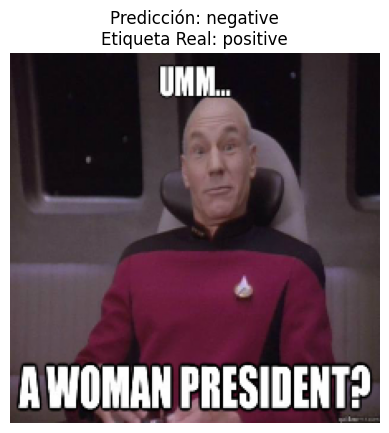

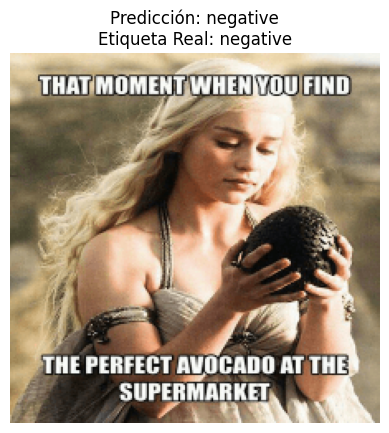

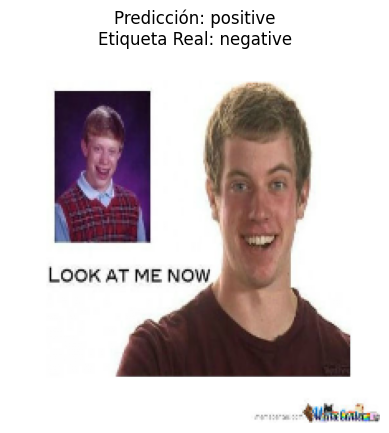

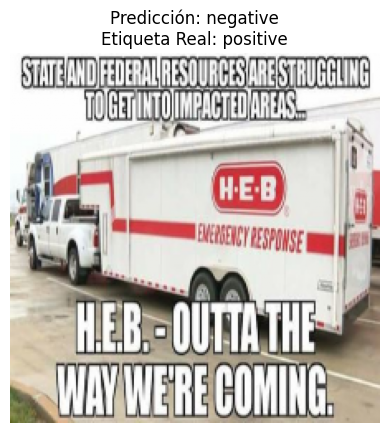

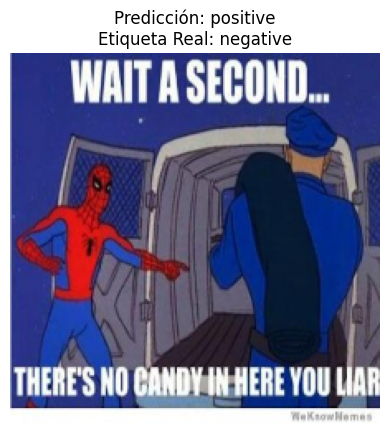

In [98]:
import matplotlib.pyplot as plt

for i in range(5):  # Mostrar 5 ejemplos
    plt.imshow(X_test_images[i])
    plt.axis('off')
    plt.title(f"Predicción: {clases_decodificadas[i]}\nEtiqueta Real: {label_encoder.inverse_transform([y_test[i]])[0]}")
    plt.show()

In [99]:
# Guardar el modelo
model.save('modelo_multimodal.h5')

# Cargar el modelo en el futuro
from tensorflow.keras.models import load_model
modelo_cargado = load_model('modelo_multimodal.h5')

46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step


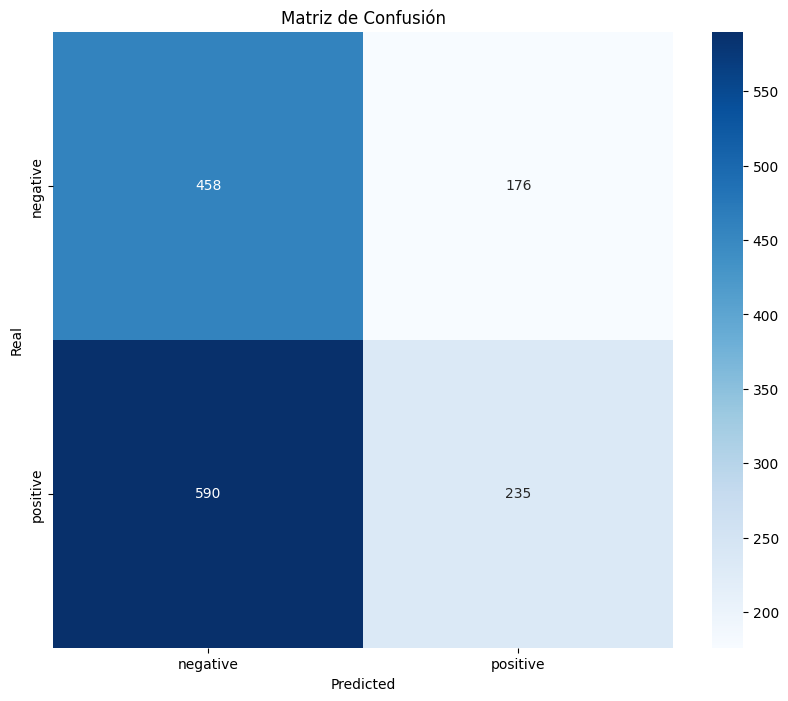

In [100]:
# matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predicciones en el conjunto de prueba
predictions = modelo_cargado.predict([X_test_images, text_data_test])
class_predict = predictions.argmax(axis=1)

# Matriz de confusión
cm = confusion_matrix(y_test, class_predict)

# Etiquetas
labels = label_encoder.classes_

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()




In [101]:
# Reporte de clasificación
from sklearn.metrics import classification_report

# Reporte de clasificación
print(classification_report(y_test, clases_predichas, target_names=labels))

ValueError: Found input variables with inconsistent numbers of samples: [1459, 5]